# Лабораторная работа 3

# Task I

## Task 1.1

задайте матрицу   и, используя теорему Гершгорина, определите расположение собственных чисел матрицы   (графически);

Зададим матрицу

In [3]:
import numpy as np
import string
import random
import matplotlib.pyplot as plt

A=np.array([[42,-14,59,-45],[-14,67,86,59],[59,86,67,-14],[-45,59,-14,42]])

In [4]:
def Circles_Gershgorin(A):
    n=len(A)
    
    radiuses=[]
    center=[]
    circles=[]
    
    for i in range(n):
        sum=0
        for j in range(n):
            if (i==j): center.append(A[i][j])
            else: sum+=abs(A[i][j])
        radiuses.append(sum)
        circles.append(plt.Circle((center[i],0),radiuses[i],color='r',fill=False))
    fig, ax=plt.subplots()
    plt.xlim(-250,250)
    plt.ylim(-250,250)
    ax.set_aspect(1)
    for i in range(n):
        ax.add_artist(circles[i])
    plt.show()
    print(radiuses)
    print(center)

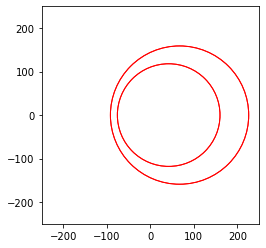

[118, 159, 159, 118]
[42, 67, 67, 42]


In [5]:
Circles_Gershgorin(A)

# Задание IB

напишите функцию, позволяющую определить манимальное и максимальное собтсвенное значение персимметрической матрицы, и исследуйте сходимость предложенного решения;

In [10]:
import numpy
def find_max(A):
    x = np.ones(len(A))
    x_norm=9999
    err=999
    while(err>10**-5):
        old_norm=x_norm
        x = np.dot(A, x)
        x_norm= np.linalg.norm(x)
        x /=  x_norm
        err=abs(x_norm-old_norm)
    return x_norm
def find_min(A):
    
    A=np.linalg.inv(A)
    x = np.ones(len(A))
    x_norm=9999
    err=999
    while(err>10**-5):
        old_norm=x_norm
        x = np.dot(A, x)
        print(x)
        x_norm= np.linalg.norm(x)
        x /=  x_norm
        err=abs(x_norm-old_norm)
    return 1/x_norm
def find_min_max(A):
    return find_max(A), find_min(A)

In [11]:
find_min_max(A)

[-0.04347826  0.01932367  0.01932367 -0.04347826]
[ 0.04500245 -0.011359   -0.011359    0.04500245]
[-0.04536424  0.01221136  0.01221136 -0.04536424]
[ 0.04538631 -0.01214761 -0.01214761  0.04538631]


(165.04998611773695, 15.049998977708167)

# Задание IC

Инициализируем матрицы

In [7]:
A=np.array([[2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]])

In [8]:
find_min(A)

0.38196601338865854

In [9]:
abs(find_max(A-4*np.eye(4))-4)

0.38196684171824735

# Задание IIA

In [25]:
m=5
alpha=0.555
def build(m,alpha):
    aa=np.eye(m-1)
    for i in range(m-1):
        for j in range(m-1):
            if (i==j): aa[i][j]=1+2*alpha
            elif (i==j-1 or j==i-1): aa[i][j]=-alpha
            else: aa[i][j]=0
    return aa
A=build(m,alpha)
print(A)
        

[[ 2.11  -0.555  0.     0.   ]
 [-0.555  2.11  -0.555  0.   ]
 [ 0.    -0.555  2.11  -0.555]
 [ 0.     0.    -0.555  2.11 ]]


In [26]:
def QR_decomposition(A):
    
    n=len(A)
    hh=[]
    ramm=A
    for i in range(n-1):
        q=[]
        for j in range(n):
            q.append(A[j][0])
        q=np.array(q)
        q=q.reshape(-1,1)
        norm=np.linalg.norm(q)
        e=[]
        for j in range(n):
            if (j==0):
                e.append(1)
            else:
                e.append(0)
        e=np.array(e)
      
        e=e.reshape(-1,1)
       
        k=np.sign(q[0])*norm
      
        v=q+np.dot(k[0],e)
        vt=v.reshape(1,-1)
       
        h=np.eye(n)-2*(np.dot(v,vt)/np.dot(vt,v))
        hh.append(h)
        A=h.dot(A)
        for i1 in range(n):
            for j1 in range(n):
                ram=float('{:.4f}'.format(A[i1][j1]))
                A[i1][j1]=ram
        A=np.delete(A,0,0)
        A=np.delete(A,0,1)
        n-=1
    q=hh[0]
    
    for i in range(1,len(hh)):
        ram2=np.eye(len(ramm))
        for j in range(i):
            ram2[j][j]=1
            for k in range(j+1,n):
                ram2[j][k]=0
                ram2[k][j]=0
        for i1 in range(len(hh[i])):
            for j1 in range(len(hh[i])):
                ram2[i+i1][i+j1]=hh[i][i1][j1]
        hh[i]=ram2
    q=hh[0]
    r=hh[len(hh)-1]
    
    for i in range(len(hh)-2,-1,-1):
        
        r=r.dot(hh[i])
    r=r.dot(ramm)
    
    for i1 in range(n):
            for j1 in range(n):
                ram=float('{:.4f}'.format(r[i1][j1]))
                r[i1][j1]=ram
    
    for i in range(1,len(hh)):
        q=q.dot(hh[i])
    for i1 in range(n):
            for j1 in range(n):
                ram=float('{:.4f}'.format(q[i1][j1]))
                q[i1][j1]=ram
    gg=np.dot(r,q)
    
    return q,r
    
    
   
    
            
                            
            
        
   
        
        
        
        

In [27]:
def QR_factorization(A):
    err=99999
    x=0
    x_norm=0
    while(err>10**-6):
        
        old_norm=x_norm
        q,r=QR_decomposition(A)
        A=np.dot(r,q)
        x=np.diag(A)
        x_norm=np.linalg.norm(x)
        err=abs(x_norm-old_norm)
    return x
        

In [28]:
QR_factorization(A)

array([3.00870103, 2.45302989, 1.76699909, 1.21199327])

In [29]:
import math
def tochno(n):
    a=[]
    for i in range(n-1):
        g=1+4*alpha*(math.sin((math.pi*(i+1)/(2*n))))**2
        a.append(g)
    return a

In [30]:
tochno(m)

[1.2119911362438083,
 1.7669911362438084,
 2.4530088637561915,
 3.0080088637561917]

# Задание IIB

In [19]:
alpha=0.0001
flag=False
for m in range(2,100):
    while (alpha<1):
        A=build(m,alpha)
        A=np.linalg.inv(A)
        c=abs(find_max(A))
        if c>=1:
            flag=True
        alpha+=0.0001
    print(flag)
    

    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


Значит промежуток (0,1) удовлетворяет условию для любого m

# Задание III

Можно было бы составить красивую легенду и т.д и т.п, но ожно просто найти определитель матрицы, перемножив все собственные

In [32]:
A=[[1,2,3],[4,5,10],[7,8,9]]
eigen_values=QR_factorization(A)
print(np.prod(eigen_values),np.linalg.det(A))

23.999540335737876 23.999999999999993


# Задание IV

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data=pd.read_excel("forPCAanalysis.xls")
print(data)
tests=data.drop(['LP'],axis=1)
tests=tests.values.tolist()
tests=np.array(tests)
for people in tests:
    if (people[0]=='французы'):
        people[0]=0
    else:
        people[0]='1'
    if (people[1]=='женщина'):
        people[1]=0
    else:
        people[1]=1
tests=np.array(tests).astype(np.float)




means=[]
for j in range(10):
    zz=[]
    for i in range(len(tests)):
        zz.append(tests[i][j])
    zz=np.array(zz)
    means.append(zz.mean())
    for i in range(len(tests)):
        tests[i][j]-=means[-1]
        tests[i][j]/=means[-1]

tests=tests.transpose()
tests=np.array(tests)
cov=np.cov(tests)
eig_vals,eig_vecs=np.linalg.eig(cov)
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i])for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x:x[0],reverse=True)
print(eig_pairs)

matrix=[]
for pair in eig_pairs:
    if (pair[0]>1):
        matrix.append(pair[1])
    
    


matrix=np.array(matrix)
c=np.dot(matrix,tests)
print(np.dot(matrix,tests))
print(c.shape)










      LP  National   gender  age      test1      test2      test3      test4  \
0      1  французы  женщина    6  77.140000  65.710000  82.860000  82.860000   
1      2  французы  женщина    6  68.570000  62.860000  80.000000  91.430000   
2      3  французы  мужчина    6  74.290000  62.860000  80.000000  85.710000   
3      4  французы  женщина    6  71.430000  65.710000  82.860000  88.570000   
4      5  французы  мужчина    6  74.290000  68.570000  85.710000  85.710000   
..   ...       ...      ...  ...        ...        ...        ...        ...   
637  638  французы  женщина   27  77.142857  60.000000  82.857143  82.857143   
638  639  французы  мужчина   28  77.142857  60.000000  88.571429  88.571429   
639  640  французы  женщина   28  77.142857  62.857143  88.571429  82.857143   
640  641  французы  женщина   30  71.428571  62.857143  77.142857  88.571429   
641  642  французы  мужчина   30  74.285714  65.714286  82.857143  82.857143   

         test5      test6      test7  
